In [1]:
import os

print(os.environ['CONDA_DEFAULT_ENV'])

kepler


Read log file

In [2]:
import csv

count = 10


def get_valid(name: str):
    valid = []
    with open(name) as csvfile:
        reader = csv.reader(csvfile, delimiter='|')
        for line, row in enumerate(reader):
            if line % 2 != 0:
                # validation
                valid.append(row)
    return valid

In [3]:
mv = get_valid('/Users/sougata/NMBU/Semester4/MyKEPLER/tram2kepler/scripts/results/kepler_train/out_multi_filtered.log')
mav = get_valid(
    '/Users/sougata/NMBU/Semester4/MyKEPLER/tram2kepler/scripts/results/kepler_train/out_multi_aug_filtered.log')
sv = get_valid(
    '/Users/sougata/NMBU/Semester4/MyKEPLER/tram2kepler/scripts/results/kepler_train/out_single_filtered.log')
sav = get_valid(
    '/Users/sougata/NMBU/Semester4/MyKEPLER/tram2kepler/scripts/results/kepler_train/out_single_aug_filtered.log')

In [4]:
import pandas as pd


def to_df(_list, minus_epoch: int):
    dict_list = []
    for sublist in _list:
        temp_dict = {}
        try:
            for item in sublist:
                if item:  # Ignore empty strings
                    key, value = item.split(' ', 1)
                    temp_dict[key] = value
            dict_list.append(temp_dict)
        except:
            print(item)
        _df = pd.DataFrame(dict_list)
        _df['epoch'] = _df['epoch'].astype(int) - minus_epoch
    return _df


In [5]:
mv = to_df(mv, 10).head(count)
mav = to_df(mav, 10).head(count)
sv = to_df(sv, 10).head(count)
sav = to_df(sav, 10).head(count)

In [6]:
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
# Convert the columns to numeric type
def to_num(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df


mv = to_num(mv)
mav = to_num(mav)
sv = to_num(sv)
sav = to_num(sav)

<Figure size 640x480 with 0 Axes>

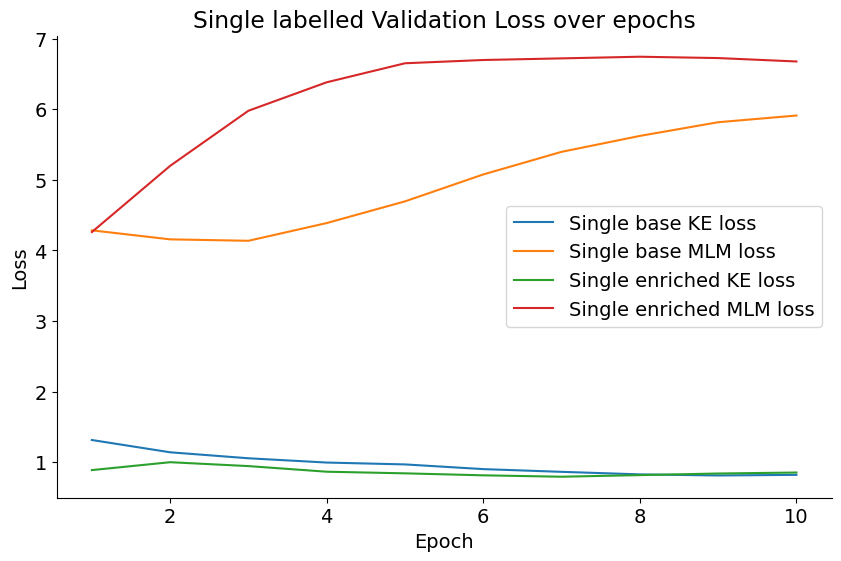

In [8]:
matplotlib.rc('font', **{'size': 14})
plt.clf()
# Plot the 'loss' column
plt.figure(figsize=(10, 6))

plt.plot(sv['epoch'], sv['ke_loss'], label='Single base KE loss')
plt.plot(sv['epoch'], sv['mlm_loss'], label='Single base MLM loss')
plt.plot(sav['epoch'], sav['ke_loss'], label='Single enriched KE loss')
plt.plot(sav['epoch'], sav['mlm_loss'], label='Single enriched MLM loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
title = f'Single labelled Validation Loss over epochs'
plt.title(title)

ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.savefig(f'{title}-{datetime.now().time()}.pdf', format='pdf')

plt.show()

<Figure size 640x480 with 0 Axes>

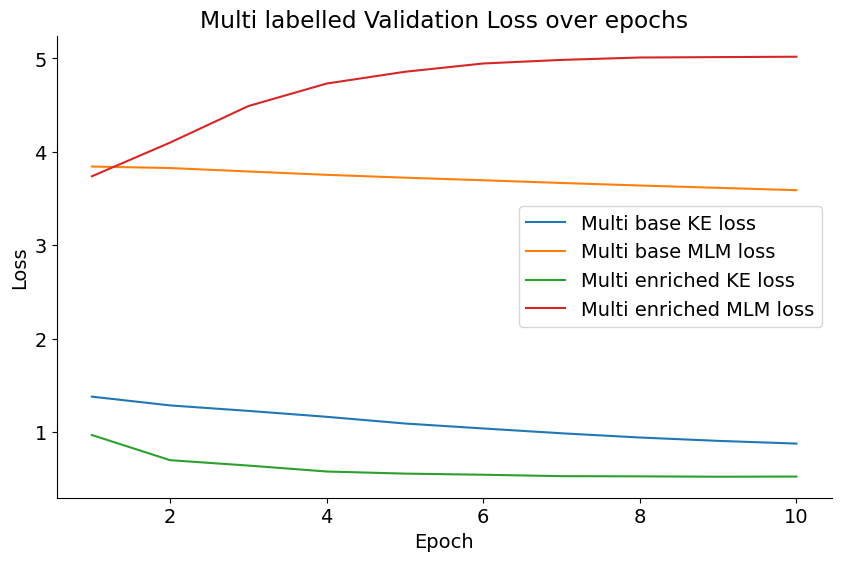

In [9]:
matplotlib.rc('font', **{'size': 14})
plt.clf()
# Plot the 'loss' column
plt.figure(figsize=(10, 6))

plt.plot(mv['epoch'],  mv['ke_loss'], label='Multi base KE loss')
plt.plot(mv['epoch'],  mv['mlm_loss'], label='Multi base MLM loss')
plt.plot(mav['epoch'], mav['ke_loss'], label='Multi enriched KE loss')
plt.plot(mav['epoch'], mav['mlm_loss'], label='Multi enriched MLM loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
title = f'Multi labelled Validation Loss over epochs'
plt.title(title)

ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.savefig(f'{title}-{datetime.now().time()}.pdf', format='pdf')

plt.show()